## 0. Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

from scipy.stats import randint

import markdown

import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier 
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.pipeline import Pipeline



## 1. Case

About Dataset
Bank marketing campaigns dataset analysis # Opening a Term Deposit

It is a dataset that describing Portugal bank marketing campaigns results.
Conducted campaigns were based mostly on direct phone calls, offering bank client to place a term deposit.
If after all marking afforts client had agreed to place deposit - target variable marked 'yes', otherwise 'no'

Sourse of the data
https://archive.ics.uci.edu/ml/datasets/bank+marketing

Citation Request:

This dataset is public available for research. The details are described in S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

    Title: Bank Marketing (with social/economic context)

    Sources
    Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014

    Past Usage:

    The full dataset (bank-additional-full.csv) was described and analyzed in:

    S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.

    Relevant Information:

    This dataset is based on "Bank Marketing" UCI dataset (please check the description at: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing).
    The data is enriched by the addition of five new social and economic features/attributes (national wide indicators from a ~10M population country), published by the Banco de Portugal and publicly available at: https://www.bportugal.pt/estatisticasweb.
    This dataset is almost identical to the one used in [Moro et al., 2014] (it does not include all attributes due to privacy concerns).
    Using the rminer package and R tool (http://cran.r-project.org/web/packages/rminer/), we found that the addition of the five new social and economic attributes (made available here) lead to substantial improvement in the prediction of a success, even when the duration of the call is not included. Note: the file can be read in R using: d=read.table('bank-additional-full.csv',header=TRUE,sep=';")

The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

    Number of Instances: 41188 for bank-additional-full.csv

    Number of Attributes: 20 + output attribute.

    Attribute information:

    For more information, read [Moro et al., 2014].

    Input variables:
    bank client data:

    *1 - age (numeric)

    *2 - job : type of job (categorical: "admin.',"blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

    *3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

    *4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

    *5 - default: has credit in default? (categorical: "no","yes","unknown")

    *6 - housing: has housing loan? (categorical: "no","yes","unknown")

    *7 - loan: has personal loan? (categorical: "no","yes","unknown")
    related with the last contact of the current campaign:
    
    *8 - contact: contact communication type (categorical: "cellular","telephone")

    *9 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

    *10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

    *11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    other attributes:

    *12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

    *13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

    *14 - previous: number of contacts performed before this campaign and for this client (numeric)

    *15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

    Social and economic context attributes

    *16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

    *17 - cons.price.idx: consumer price index - monthly indicator (numeric)

    *18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

    *19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

    *20 - nr.employed: number of employees - quarterly indicator (numeric)

    Output variable (desired target):

    *21 - y - has the client subscribed a term deposit? (binary: "yes","no")

    Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.


## 2. Data

### 2.1. Preliminary

In [3]:
df_bank = pd.read_csv('bank-additional-full.csv', sep=';')

In [4]:
df_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
df_bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
print("Uniqe values of object columns\n")
print(df_bank.select_dtypes(include=['object']).nunique())

Uniqe values of object columns

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: int64


In [7]:
print("Job:",df_bank.job.value_counts(), "\n")
print("-"*25)
print("Marital:",df_bank.marital.value_counts(), "\n")
print("-"*25)
print("Education:",df_bank.education.value_counts(), "\n")
print("-"*25)
print("Default:",df_bank.default.value_counts(), "\n")
print("-"*25)
print("Housing loan:",df_bank.housing.value_counts(),"\n")
print("-"*25)
print("Personal loan:",df_bank.loan.value_counts(), "\n")
print("-"*25)
print("Contact:",df_bank.contact.value_counts(), "\n")
print("-"*25)
print("Month contacted:",df_bank.month.value_counts(), "\n")
print("-"*25)
print("Day contacted:",df_bank.day_of_week.value_counts(), "\n")
print("-"*25)
print("Previous outcome:",df_bank.poutcome.value_counts(), "\n")
print("-"*25)
print("Outcome of this campaign:",df_bank.y.value_counts(), "\n")
print("-"*25)

Job: job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64 

-------------------------
Marital: marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64 

-------------------------
Education: education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64 

-------------------------
Default: default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64 

-------------------------
Housing loan: housing
yes        21576
no         18622
unknown      990
Name: count, dty

### 2.2. Handling Null/Missing values

In [8]:
nullval = df_bank.isnull().sum()
nullval

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### 2.3. EDA

##### 2.3.1 Deposit Proportion

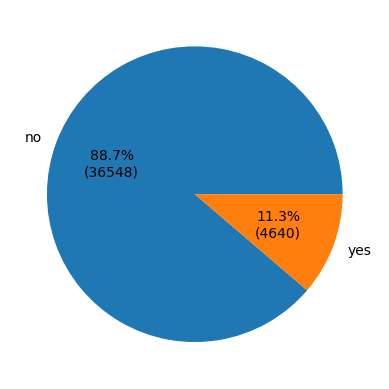

In [9]:
counts = x = df_bank['y'].value_counts()
labels = counts.index.tolist()
sizes = counts.values.tolist()
total = sum(sizes)

def autopct_format(pct):
        absolute_count = int(pct/100.*total)
        return f"{pct:.1f}%\n({absolute_count})"

plt.pie(
    x = sizes,
    labels = labels,
    autopct=autopct_format
    )
plt.show()

##### 2.3.1.1 EDA - Numerical Features

In [10]:
features = df_bank.select_dtypes(include=['float64', 'int64']).columns.tolist()
# features.remove('y')
print(features)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


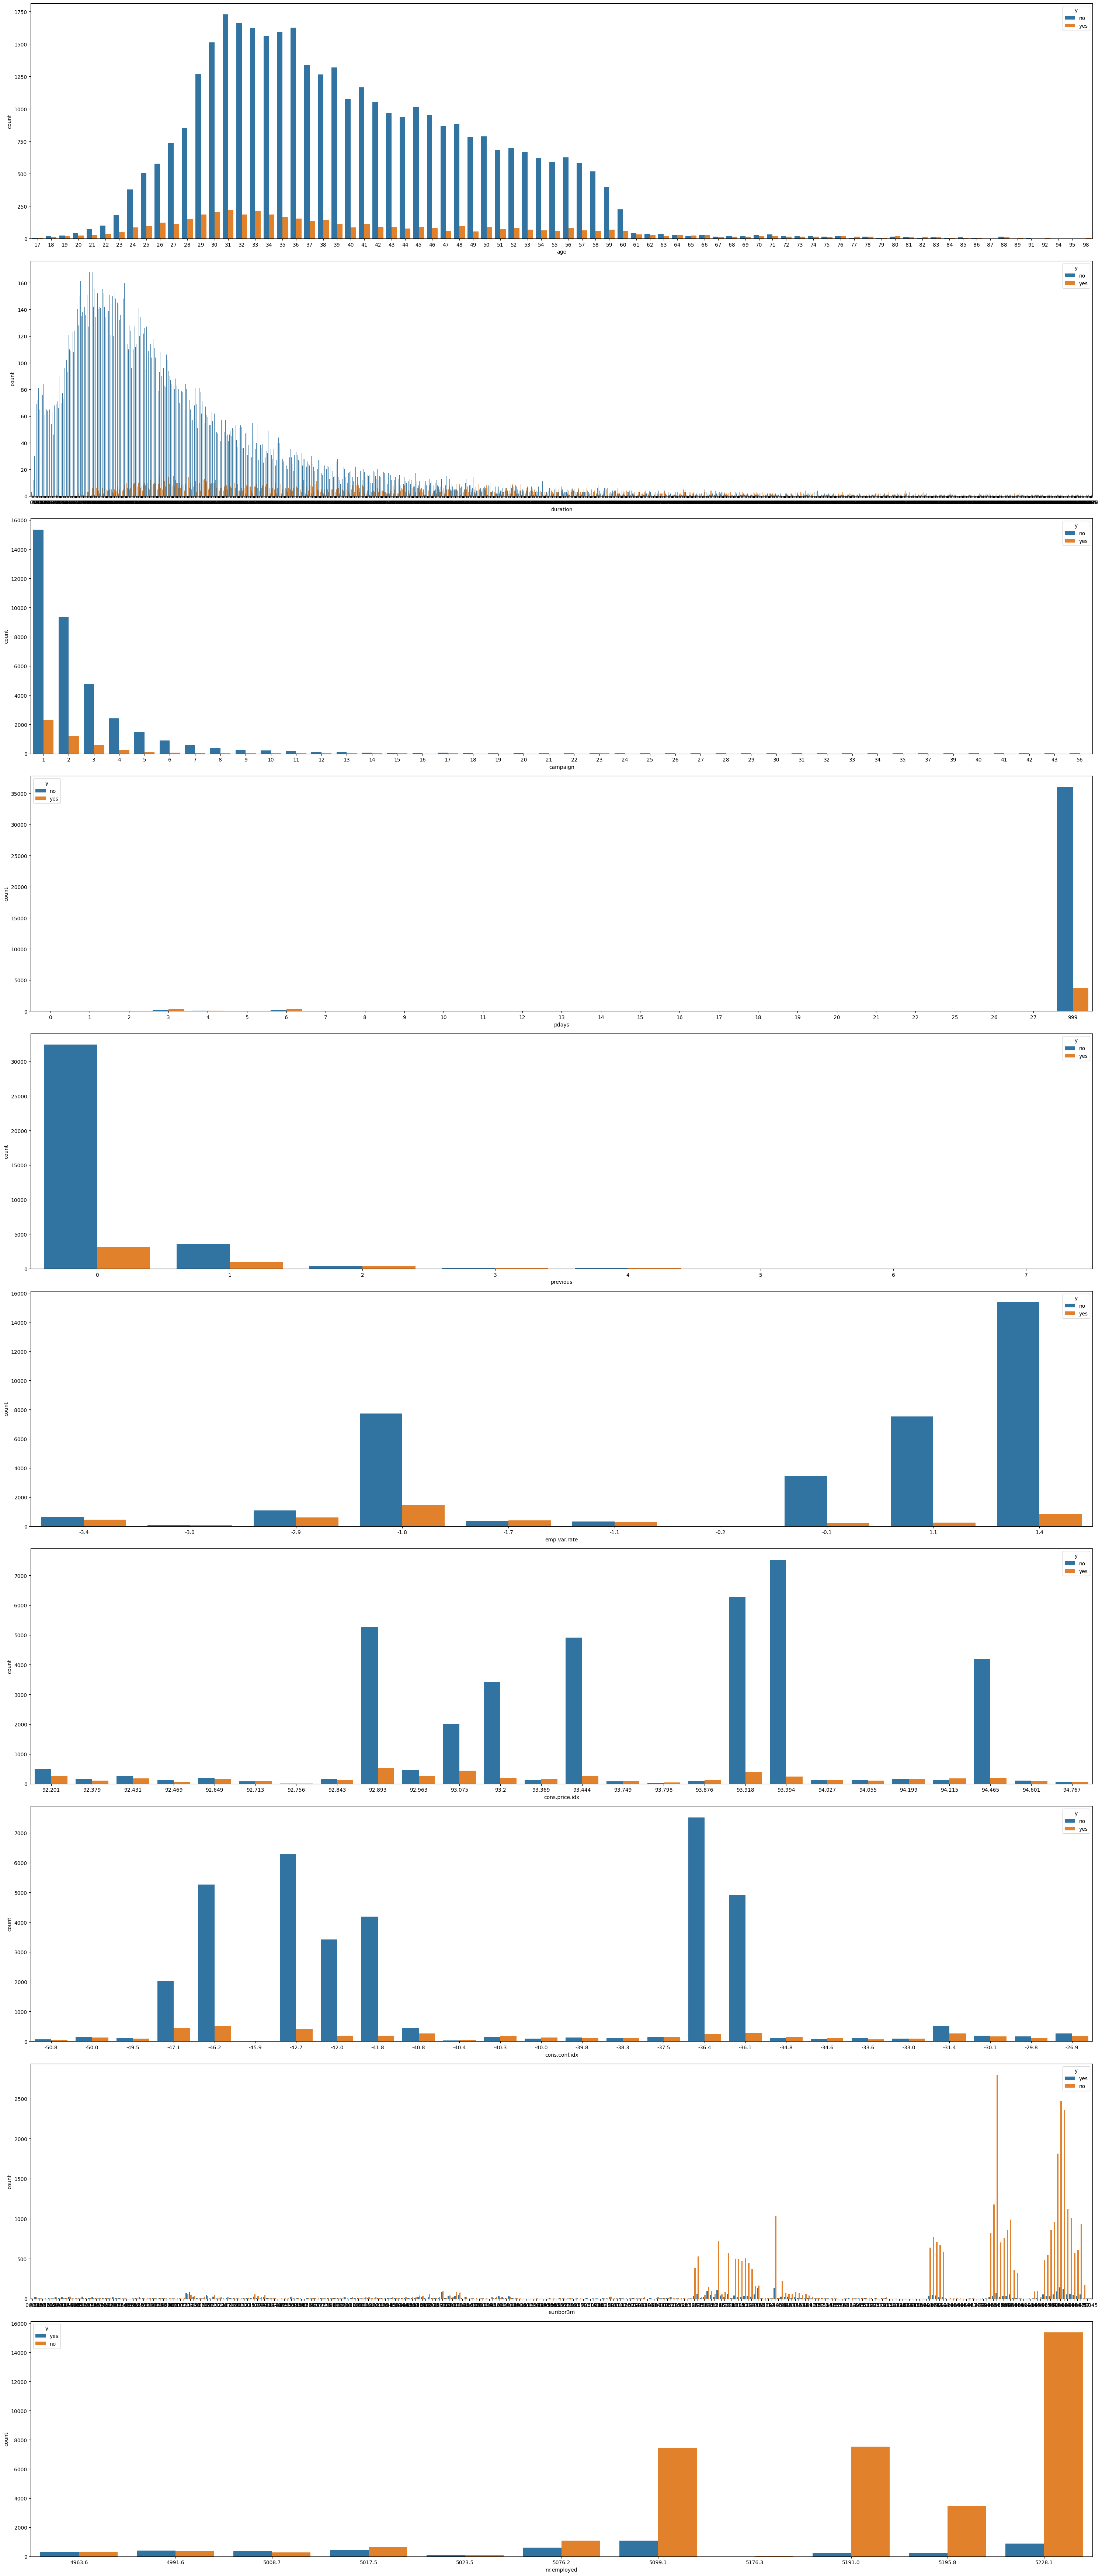

In [11]:
fig, axs = plt.subplots(nrows=10, ncols=1, figsize=(30, 70))
axs = axs.flatten()

for i, x_val in enumerate(features):
    sns.countplot(x = x_val, hue = 'y', data = df_bank, ax=axs[i])

fig.tight_layout()

# fig.delaxes(axs[8])

plt.show()

In [12]:
df_bank.y = df_bank.y.map({'no':0, 'yes':1}).astype('int64')
df_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


<Axes: >

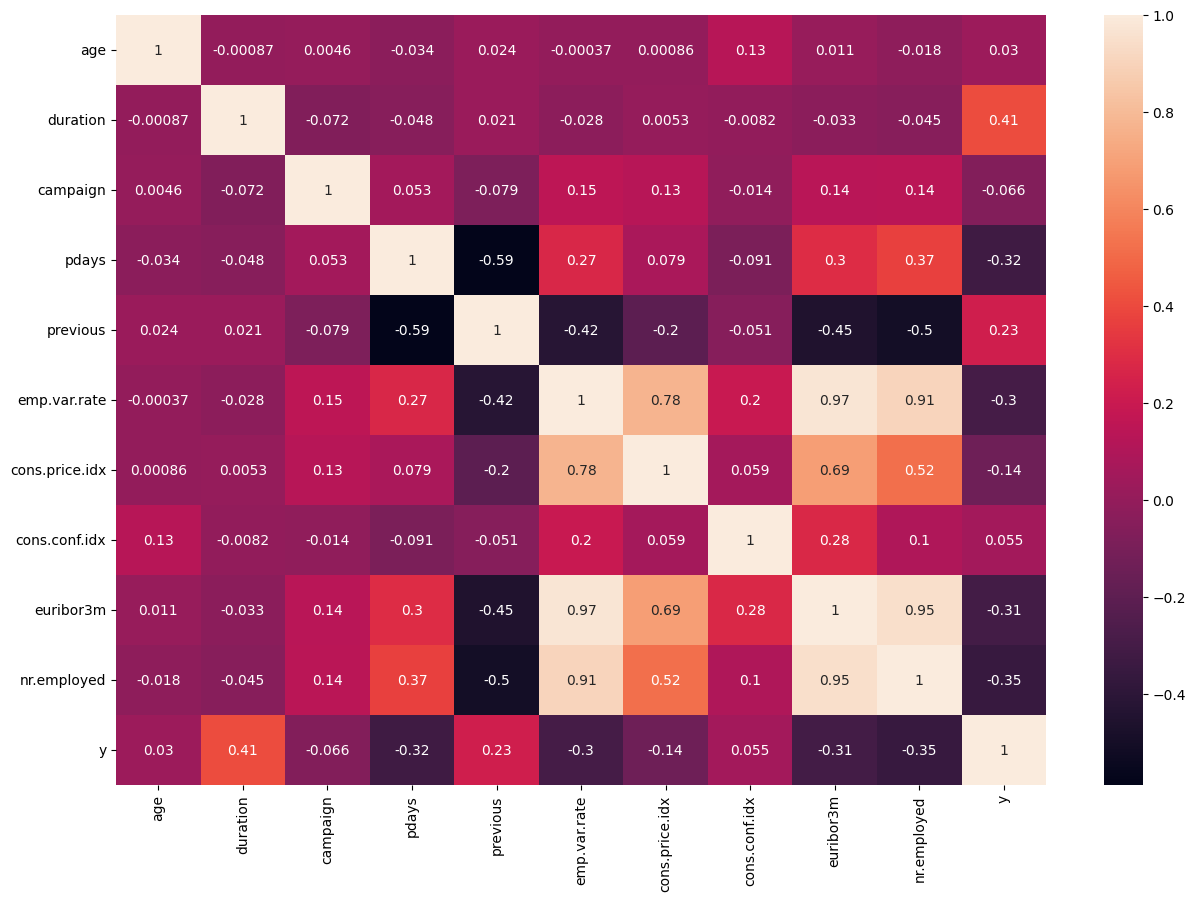

In [13]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_bank[df_bank.select_dtypes(include=['float64', 'int64']).columns.tolist()].corr(), annot=True)

##### 2.3.1.2 EDA - Categorical Features

In [14]:
features_cat = df_bank.select_dtypes(include=['object']).columns.tolist()
# features_cat.remove('y')
print(features_cat)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


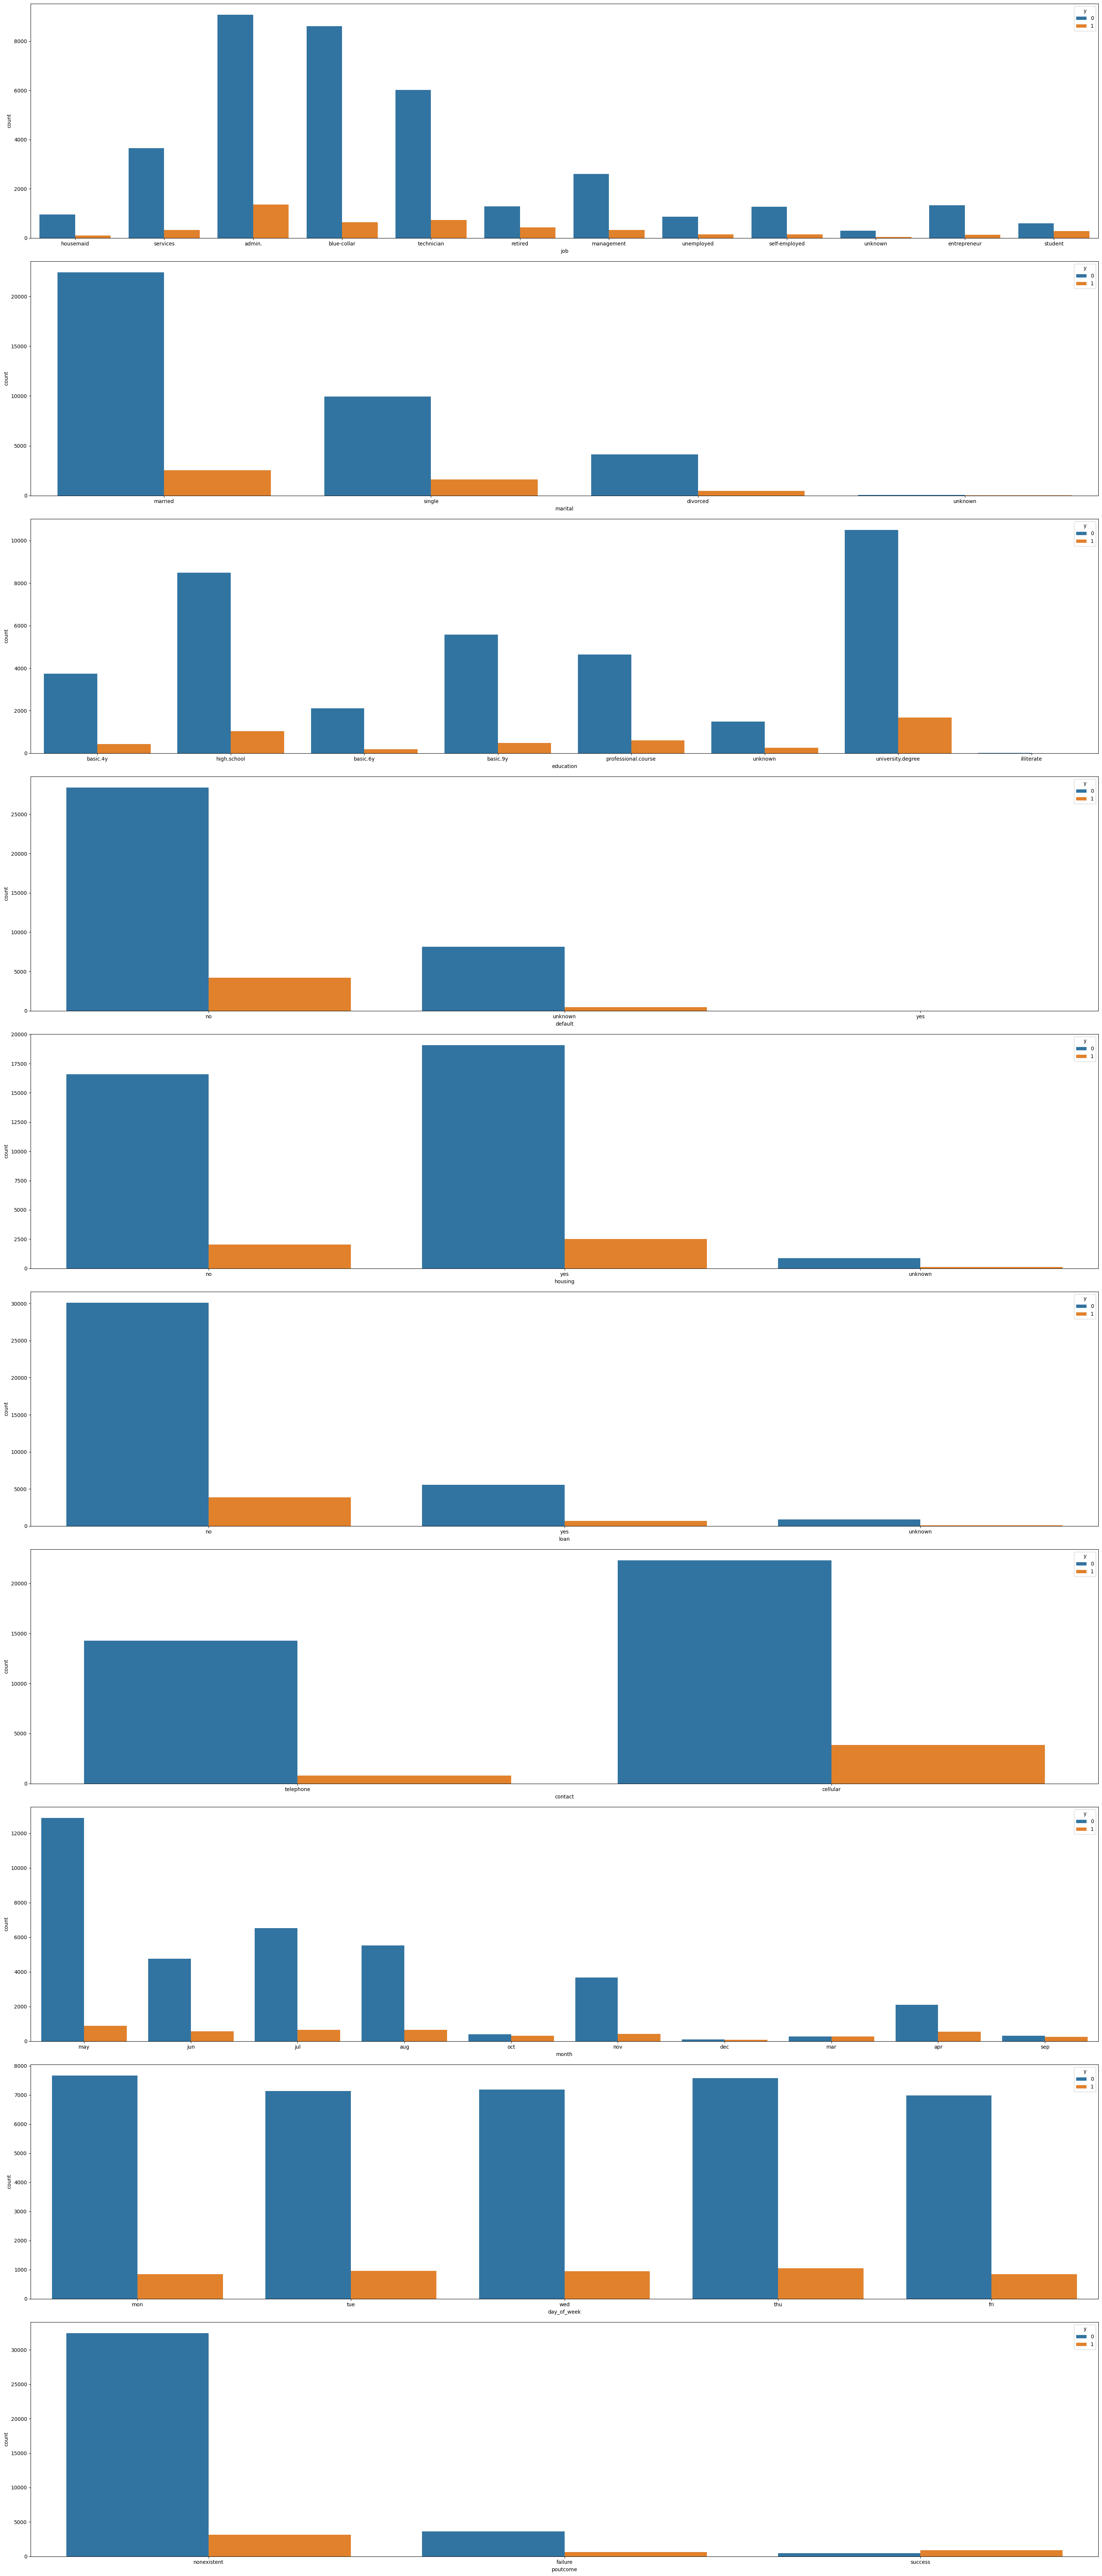

In [15]:
fig, axs = plt.subplots(nrows=10, ncols=1, figsize=(30, 70))
axs = axs.flatten()

for i, x_val in enumerate(features_cat):
    sns.countplot(x = x_val, hue = 'y', data = df_bank, ax=axs[i])

fig.tight_layout()

# fig.delaxes(axs[8])

plt.show()

#### 2.3.2 Numerical Features Subplot Distribution

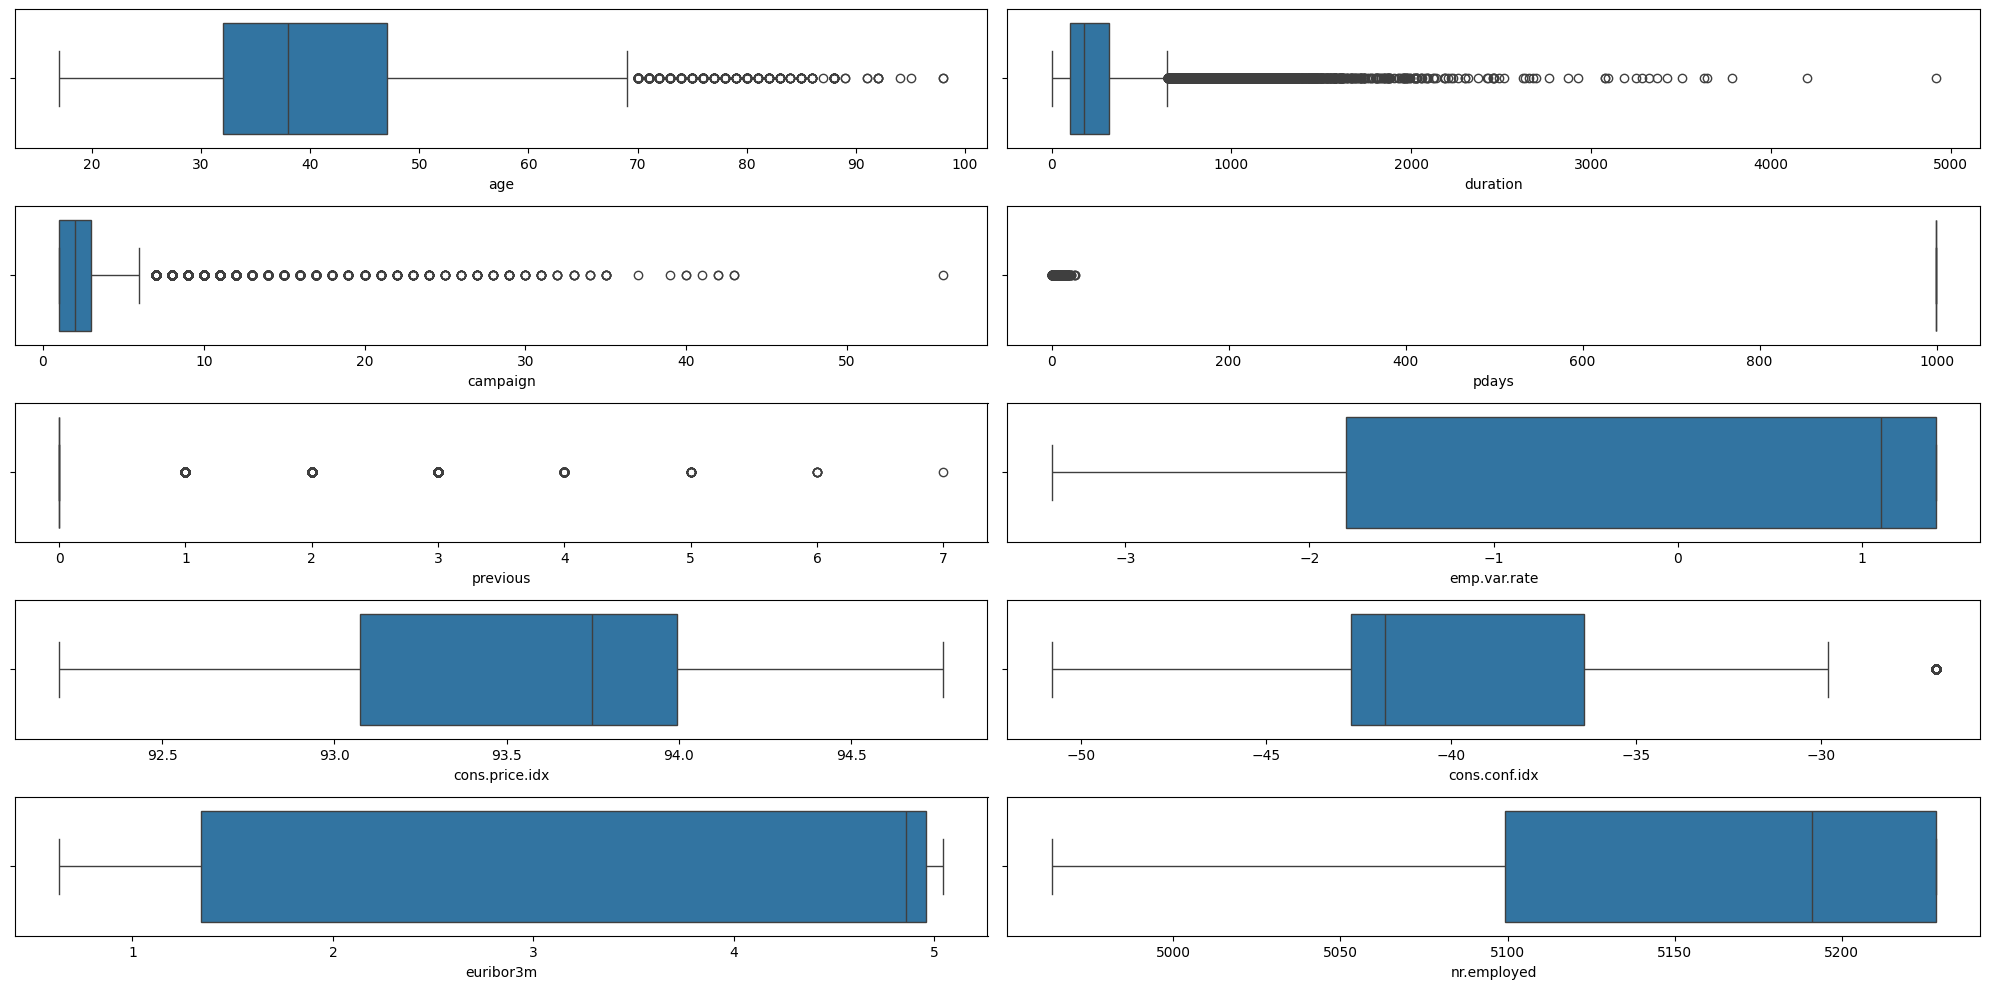

In [16]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, x_val in enumerate(features):
    sns.boxplot(x = x_val, data = df_bank, ax=axs[i])

fig.tight_layout()

plt.show()

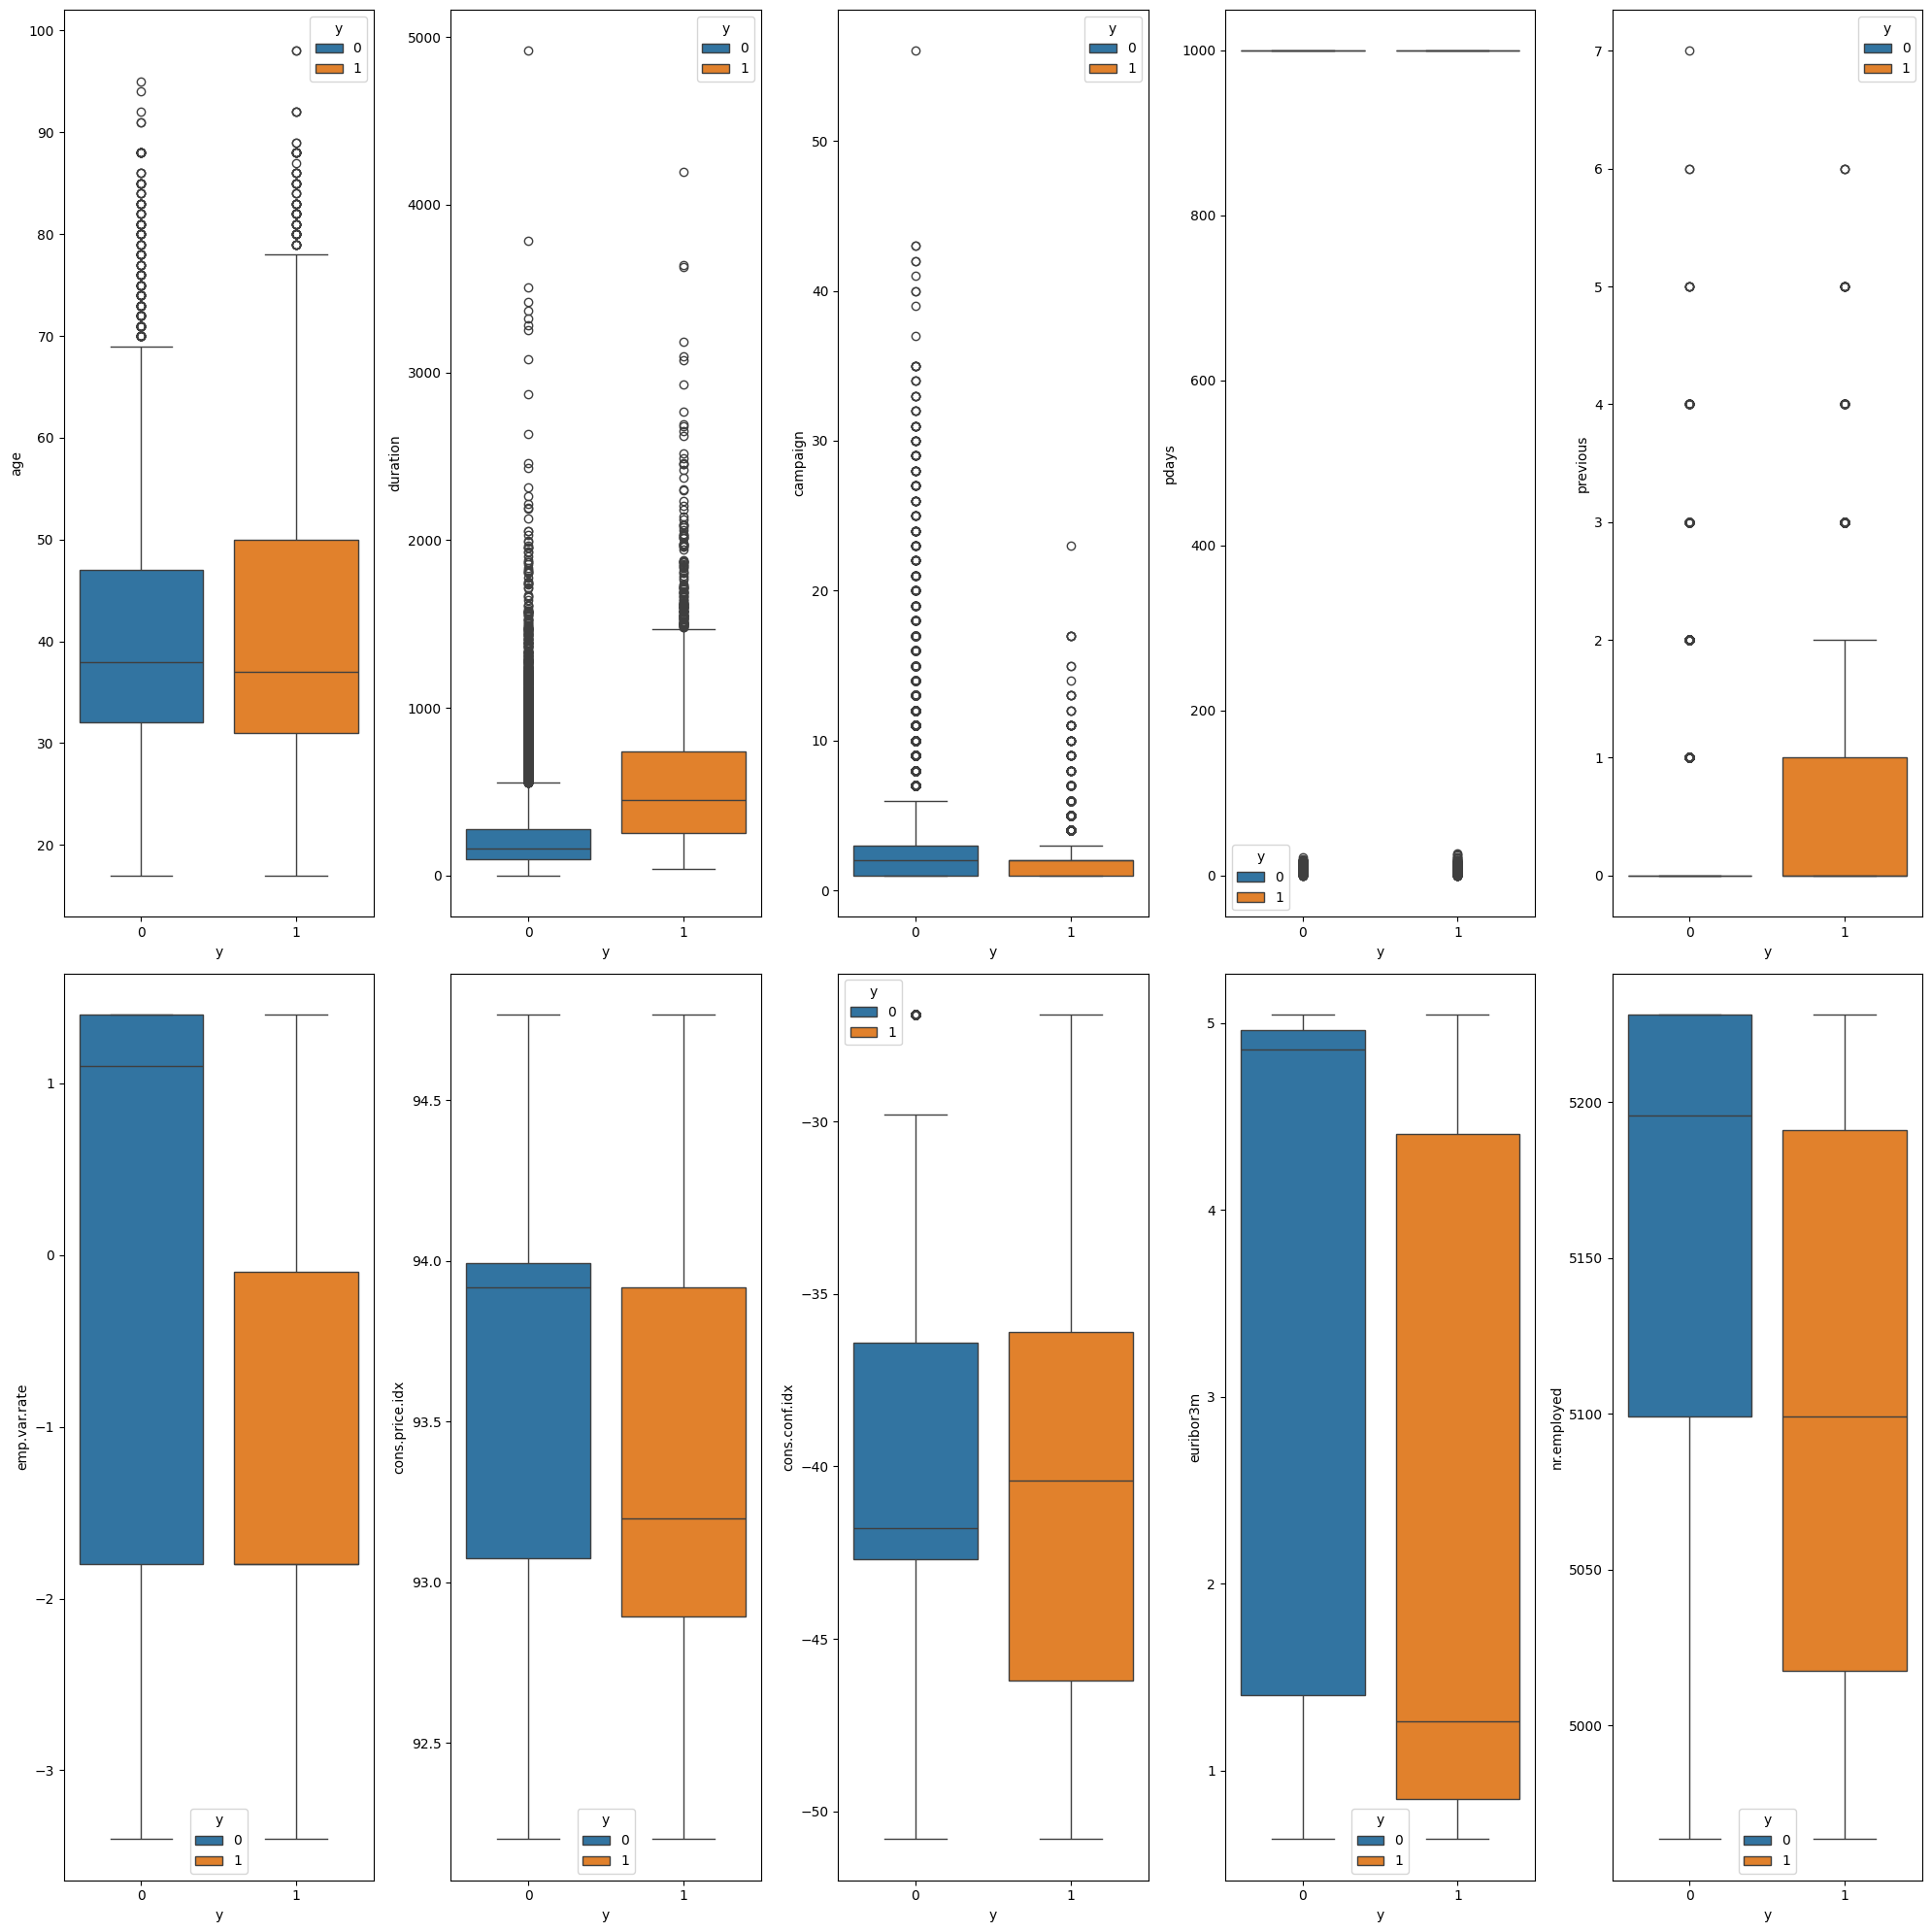

In [17]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 20))
axs = axs.flatten()

for i, x_val in enumerate(features):
    sns.boxplot(y = x_val, x = 'y', hue = 'y', data=df_bank, ax=axs[i])

fig.tight_layout()

plt.show()

## 3. Preprocessing

### 3.1. Encoding

One Hot Encoding : job, marital, contact, poutcome

Hard Binary Encoding alternative : loan, housing, default (yes = 1, no = 0, unknown = -1)

Hard Binary Encoding: y (deposit subscription converted yes = 1 or no = 0)

Hard Ordinal Encoding : Education

Hard Ordinal Encoding: month, day

Hard Encoding pdays : 999 to -1

In [23]:
df_bank.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [24]:
df = df_bank.copy()

#### 3.1.1. One Hot Encoding

In [25]:
onehot_columns = ['job', 'marital', 'contact', 'poutcome']

In [26]:
df = pd.get_dummies(df, columns = onehot_columns, dtype=int)

df

,age,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,...,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,basic.4y,no,no,no,may,mon,261,1,999,...,0,0,1,0,0,0,1,0,1,0
1,57,high.school,unknown,no,no,may,mon,149,1,999,...,0,0,1,0,0,0,1,0,1,0
2,37,high.school,no,yes,no,may,mon,226,1,999,...,0,0,1,0,0,0,1,0,1,0
3,40,basic.6y,no,no,no,may,mon,151,1,999,...,0,0,1,0,0,0,1,0,1,0
4,56,high.school,no,no,yes,may,mon,307,1,999,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,professional.course,no,yes,no,nov,fri,334,1,999,...,0,0,1,0,0,1,0,0,1,0
41184,46,professional.course,no,no,no,nov,fri,383,1,999,...,0,0,1,0,0,1,0,0,1,0
41185,56,university.degree,no,yes,no,nov,fri,189,2,999,...,0,0,1,0,0,1,0,0,1,0
41186,44,professional.course,no,no,no,nov,fri,442,1,999,...,0,0,1,0,0,1,0,0,1,0


#### 3.1.2. Binary Encoding -- [Deprecated (Placeholder)]

In [27]:
# binary_columns = ['loan', 'housing', 'default']

In [28]:
# binary_encoding = ce.BinaryEncoder(cols=binary_columns)
# binary_encoding.fit(df[binary_columns])

# df = pd.concat([df, binary_encoding.transform(df[binary_columns])], axis=1)
# df.drop(binary_columns, axis=1, inplace=True)

# df

#### 3.1.3. Label Encoding -- [Deprecated (Plaeceholder)]

In [29]:
# binary_columns = ['loan', 'housing', 'default']

In [30]:
# binary_encoding = ce.BinaryEncoder(cols=binary_columns)
# binary_encoding.fit(df[binary_columns])

# df = pd.concat([df, binary_encoding.transform(df[binary_columns])], axis=1)
# df.drop(binary_columns, axis=1, inplace=True)

# df

#### 3.1.4. Hard Ordinal Encoding (Education)

In [31]:
df['education'] = df['education'].map(
            {'unknown': 1, 
            'illiterate': 1, 
            'basic.4y': 2, 
            'basic.6y': 3, 
            'basic.9y': 4, 
            'high.school': 5, 
            'professional.course': 6, 
            'university.degree': 7})
df

,age,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,...,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,2,no,no,no,may,mon,261,1,999,...,0,0,1,0,0,0,1,0,1,0
1,57,5,unknown,no,no,may,mon,149,1,999,...,0,0,1,0,0,0,1,0,1,0
2,37,5,no,yes,no,may,mon,226,1,999,...,0,0,1,0,0,0,1,0,1,0
3,40,3,no,no,no,may,mon,151,1,999,...,0,0,1,0,0,0,1,0,1,0
4,56,5,no,no,yes,may,mon,307,1,999,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,no,yes,no,nov,fri,334,1,999,...,0,0,1,0,0,1,0,0,1,0
41184,46,6,no,no,no,nov,fri,383,1,999,...,0,0,1,0,0,1,0,0,1,0
41185,56,7,no,yes,no,nov,fri,189,2,999,...,0,0,1,0,0,1,0,0,1,0
41186,44,6,no,no,no,nov,fri,442,1,999,...,0,0,1,0,0,1,0,0,1,0


#### 3.1.5. Hard Binary Encoding (Loan, Housing, Default, y or actual deposit making/target variable)

In [32]:
# Alternative 1 ----------------------------------------------
# Unknown encoded to 0

# df['loan'] = df['loan'].map(
#             {'unknown': 0, 
#             'no': 0, 
#             'yes': 1})

# df['housing'] = df['housing'].map(
#             {'unknown': 0, 
#             'no': 0, 
#             'yes': 1})

# df['default'] = df['default'].map(
#             {'unknown': 0, 
#             'no': 0, 
#             'yes': 1})

# Alternative 2 ----------------------------------------------
# Unknown encoded to -1

df['loan'] = df['loan'].map(
            {'unknown': -1, 
            'no': 0, 
            'yes': 1})

df['housing'] = df['housing'].map(
            {'unknown': -1, 
            'no': 0, 
            'yes': 1})

df['default'] = df['default'].map(
            {'unknown': -1, 
            'no': 0, 
            'yes': 1})

df

,age,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,...,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,2,0,0,0,may,mon,261,1,999,...,0,0,1,0,0,0,1,0,1,0
1,57,5,-1,0,0,may,mon,149,1,999,...,0,0,1,0,0,0,1,0,1,0
2,37,5,0,1,0,may,mon,226,1,999,...,0,0,1,0,0,0,1,0,1,0
3,40,3,0,0,0,may,mon,151,1,999,...,0,0,1,0,0,0,1,0,1,0
4,56,5,0,0,1,may,mon,307,1,999,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,0,1,0,nov,fri,334,1,999,...,0,0,1,0,0,1,0,0,1,0
41184,46,6,0,0,0,nov,fri,383,1,999,...,0,0,1,0,0,1,0,0,1,0
41185,56,7,0,1,0,nov,fri,189,2,999,...,0,0,1,0,0,1,0,0,1,0
41186,44,6,0,0,0,nov,fri,442,1,999,...,0,0,1,0,0,1,0,0,1,0


#### 3.1.6. Hard Ordinal Encoding (Month, Day)

In [33]:
df['month'] = df['month'].map(
            {'jan': 1,
            'feb': 2,
            'mar': 3,
            'apr': 4,
            'may': 5,
            'jun': 6,
            'jul': 7,
            'aug': 8,
            'sep': 9,
            'oct': 10,
            'nov': 11,
            'dec': 12})

df['day_of_week'] = df['day_of_week'].map(
            {'mon': 1,
            'tue': 2,
            'wed': 3,
            'thu': 4,
            'fri': 5,
            'sat': 6,
            'sun': 7})

df

,age,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,...,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,2,0,0,0,5,1,261,1,999,...,0,0,1,0,0,0,1,0,1,0
1,57,5,-1,0,0,5,1,149,1,999,...,0,0,1,0,0,0,1,0,1,0
2,37,5,0,1,0,5,1,226,1,999,...,0,0,1,0,0,0,1,0,1,0
3,40,3,0,0,0,5,1,151,1,999,...,0,0,1,0,0,0,1,0,1,0
4,56,5,0,0,1,5,1,307,1,999,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,0,1,0,11,5,334,1,999,...,0,0,1,0,0,1,0,0,1,0
41184,46,6,0,0,0,11,5,383,1,999,...,0,0,1,0,0,1,0,0,1,0
41185,56,7,0,1,0,11,5,189,2,999,...,0,0,1,0,0,1,0,0,1,0
41186,44,6,0,0,0,11,5,442,1,999,...,0,0,1,0,0,1,0,0,1,0


#### 3.1.7. Encoding (pdays)

In [ ]:
#### Encoding (pdays)
#### Maybe encode 999 to 0? or 999 to -1

df['pdays'] = df['pdays'].replace(999, -1)
df

### 3.2. Data Splitting

In [64]:
# Creating a new dataframe for further operation
df_split = df.copy()

In [ ]:
# Final sanity check of null values before moving forward

df_split.isnull().sum()

age                     0
education               0
default                 0
housing                 0
loan                    0
month                   0
day_of_week             0
duration                0
campaign                0
pdays                   0
previous                0
emp.var.rate            0
cons.price.idx          0
cons.conf.idx           0
euribor3m               0
nr.employed             0
y                       0
job_admin.              0
job_blue-collar         0
job_entrepreneur        0
job_housemaid           0
job_management          0
job_retired             0
job_self-employed       0
job_services            0
job_student             0
job_technician          0
job_unemployed          0
job_unknown             0
marital_divorced        0
marital_married         0
marital_single          0
marital_unknown         0
contact_cellular        0
contact_telephone       0
poutcome_failure        0
poutcome_nonexistent    0
poutcome_success        0
dtype: int64

In [ ]:
# Train-test split

y = df_split['y']
X = df_split.drop(columns=['y'])


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2024)

### 3.3. Scaling (Option 1: Min-Max Scaler/Normalization)

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 3.3.b Scaling (Option 2: Z-score Normalization/Standard Scaler or Standardization)

In [51]:
from sklearn.preprocessing import StandardScaler

In [55]:
s_scaler = StandardScaler()

s_scaler.fit(X_train)
X_train_s_scaled = s_scaler.transform(X_train)
X_test_s_scaled = s_scaler.transform(X_test) 

### 3.4. Upsample

In [56]:
#Before upsampling

print(f'X_train size (min-max scaled) : {X_train_scaled.size}')
print(f'X_train size (standard scaled) : {X_train_s_scaled.size}')
print(f'y_train size : {y_train.size}')

print(f'X_train row length (min-max scaled) : {len(X_train_scaled)}')
print(f'X_train row length (standard scaled) : {len(X_train_s_scaled)}')
print(f'y_train row length : {len(y_train)}')



print(f'X_test size (min-max scaled): {X_test_scaled.size}')
print(f'X_test size (standard scaled): {X_test_s_scaled.size}')
print(f'y_test size : {y_test.size}')


X_train size (min-max scaled) : 1219150
X_train size (standard scaled) : 1219150
y_train size : 32950
X_train row length (min-max scaled) : 32950
X_train row length (standard scaled) : 32950
y_train row length : 32950
X_test size (min-max scaled): 304806
X_test size (standard scaled): 304806
y_test size : 8238


In [57]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy = 1, random_state=1)   
X_train_scaledupsampled, y_train_scaledupsampled = sm.fit_resample(X_train_scaled, y_train.ravel())
X_train_s_scaledupsampled, y_train_s_scaledupsampled = sm.fit_resample(X_train_s_scaled, y_train.ravel())

In [58]:
# After upsampling

print(f'X_train upsampled size (min-max scaled) : {X_train_scaledupsampled.size}')
print(f'X_train upsampled size (standard scaled) : {X_train_s_scaledupsampled.size}')
print(f'y_train upsampled size (min-max scaled) : {y_train_scaledupsampled.size}')
print(f'y_train upsampled size (standard scaled) : {y_train_s_scaledupsampled.size}')

print(f'X_train upsampled row length (min-max scaled) : {len(X_train_scaledupsampled)}')
print(f'X_train upsampled row length (standard scaled) : {len(X_train_s_scaledupsampled)}')
print(f'y_train upsampled row length (min-max scaled) : {len(y_train_scaledupsampled)}')
print(f'y_train upsampled row length (standard scaled) : {len(y_train_s_scaledupsampled)}')

X_train upsampled size (min-max scaled) : 2163612
X_train upsampled size (standard scaled) : 2163612
y_train upsampled size (min-max scaled) : 58476
y_train upsampled size (standard scaled) : 58476
X_train upsampled row length (min-max scaled) : 58476
X_train upsampled row length (standard scaled) : 58476
y_train upsampled row length (min-max scaled) : 58476
y_train upsampled row length (standard scaled) : 58476


## 4. Model

### 4.1. Tree (setup)

In [43]:
tree_entropy = DecisionTreeClassifier(
    criterion = 'entropy', 
    random_state = 2024)

tree_entropy

DecisionTreeClassifier(criterion='entropy', random_state=2024)

In [44]:
tree_gini = DecisionTreeClassifier(
    criterion = 'gini', 
    random_state = 2024)

tree_gini

DecisionTreeClassifier(random_state=2024)

### 4.2. Different Models Tested with Train Set

In [45]:
models=[
    #Ensemble
    AdaBoostClassifier(),
    BaggingClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    
    #Linear
    LogisticRegression(),

    #Decision Tree
    tree_entropy,
    tree_gini,
    
    #KNN
    KNeighborsClassifier(),
    
    #XGBoost
    XGBClassifier()
]


scoring_list = ['accuracy','precision', 'recall', 'f1']

In [ ]:
# Model WITHOUT Upsampling (+ Min-Max Scaler)

dct_models = {}
dct_upd = {}
dct_keys = ['model', 'accuracy','precision', 'recall', 'f1']
dct_result = []
dct = []

for m in models:
    dct_result.insert(len(dct_result), f'{m.__class__.__name__}')
    for s in scoring_list:
        model_cv = cross_val_score(
            m, 
            X_train_scaled, 
            y_train, 
            scoring = s
            )
        dct_result.insert(len(dct_result), f'{round(model_cv.mean(),3)}')
    
    dct.insert(len(dct), dct_result)
    dct_result=[]

df_modelresult_notupsampled = pd.DataFrame(dct, columns=['model', 'accuracy','precision', 'recall', 'f1'])

In [ ]:
# Model WITH Upsampling (+ Min-Max Scaler)

dct_models = {}
dct_upd = {}
dct_keys = ['model', 'accuracy','precision', 'recall', 'f1']
dct_result = []
dct = []

for m in models:
    dct_result.insert(len(dct_result), f'{m.__class__.__name__}')
    for s in scoring_list:
        model_cv = cross_val_score(
            m, 
            X_train_scaledupsampled, 
            y_train_scaledupsampled,
            # X_train_scaled, 
            # y_train, 
            scoring = s
            )
        dct_result.insert(len(dct_result), f'{round(model_cv.mean(),3)}')
    
    dct.insert(len(dct), dct_result)
    dct_result=[]

df_modelresult_upsampled = pd.DataFrame(dct, columns=['model', 'accuracy','precision', 'recall', 'f1'])

In [59]:
# Model WITH Upsampling (+ Standard Scaler)

dct_models = {}
dct_upd = {}
dct_keys = ['model', 'accuracy','precision', 'recall', 'f1']
dct_result = []
dct = []

for m in models:
    dct_result.insert(len(dct_result), f'{m.__class__.__name__}')
    for s in scoring_list:
        model_cv = cross_val_score(
            m, 
            X_train_s_scaledupsampled, 
            y_train_s_scaledupsampled,
            scoring = s
            )
        dct_result.insert(len(dct_result), f'{round(model_cv.mean(),3)}')
    
    dct.insert(len(dct), dct_result)
    dct_result=[]

df_modelresult_s_upsampled = pd.DataFrame(dct, columns=['model', 'accuracy','precision', 'recall', 'f1'])

In [61]:
#Score result of not upsampled features (min-max scaled)

df_modelresult_notupsampled.sort_values('accuracy', ascending=False)

,model,accuracy,precision,recall,f1
2,GradientBoostingClassifier,0.916,0.661,0.522,0.583
8,XGBClassifier,0.915,0.64,0.551,0.592
3,RandomForestClassifier,0.914,0.658,0.504,0.569
1,BaggingClassifier,0.908,0.627,0.477,0.537
4,LogisticRegression,0.908,0.671,0.366,0.473
0,AdaBoostClassifier,0.905,0.632,0.377,0.472
7,KNeighborsClassifier,0.894,0.565,0.256,0.352
5,DecisionTreeClassifier,0.892,0.522,0.522,0.521
6,DecisionTreeClassifier,0.89,0.511,0.525,0.518


In [62]:
#Score result of not upsampled features (min-max scaled)

df_modelresult_upsampled.sort_values('accuracy', ascending=False)

,model,accuracy,precision,recall,f1
3,RandomForestClassifier,0.948,0.941,0.958,0.946
1,BaggingClassifier,0.935,0.939,0.928,0.93
2,GradientBoostingClassifier,0.928,0.916,0.944,0.928
5,DecisionTreeClassifier,0.922,0.925,0.919,0.918
8,XGBClassifier,0.922,0.954,0.89,0.903
6,DecisionTreeClassifier,0.919,0.924,0.915,0.915
0,AdaBoostClassifier,0.906,0.901,0.913,0.905
7,KNeighborsClassifier,0.899,0.845,0.978,0.907
4,LogisticRegression,0.876,0.866,0.889,0.878


In [63]:
#Score result of not upsampled features (standard scaled)

df_modelresult_s_upsampled.sort_values('accuracy', ascending=False)

,model,accuracy,precision,recall,f1
3,RandomForestClassifier,0.949,0.943,0.956,0.947
1,BaggingClassifier,0.933,0.94,0.927,0.931
2,GradientBoostingClassifier,0.923,0.922,0.926,0.919
7,KNeighborsClassifier,0.923,0.871,0.994,0.928
5,DecisionTreeClassifier,0.92,0.925,0.915,0.915
6,DecisionTreeClassifier,0.92,0.924,0.916,0.916
8,XGBClassifier,0.92,0.956,0.886,0.899
0,AdaBoostClassifier,0.91,0.906,0.915,0.909
4,LogisticRegression,0.874,0.864,0.888,0.876
